In [77]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Load Dataset

In [78]:
# load dataset
data = pd.read_csv('Itwaru.csv')

### Convert Categorical Columns Into Numeric Data

In [79]:
# convert categorical column to numerical
data
data.set_index('ID', inplace=True)
categorical_cols = [
  'Gender', 'Married', 'Education', 'Self_Employed', 'Area'
]

for col in categorical_cols:
    data[col] = data[col].astype('category').cat.codes

data


,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
ID,,,,,,,,,,,,
1,1,0,0,0,0,584900,0.0,15000000,360,1,2,Y
2,1,1,1,0,0,458300,150800.0,12800000,360,1,0,N
3,1,1,0,0,1,300000,0.0,6600000,360,1,2,Y
4,1,1,0,1,0,258300,235800.0,12000000,360,1,2,Y
5,1,0,0,0,0,600000,0.0,14100000,360,1,2,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
495,0,0,0,0,0,290000,0.0,7100000,360,1,0,Y
496,1,1,4,0,0,410600,0.0,4000000,180,1,0,Y
497,1,1,1,0,0,807200,24000.0,25300000,360,1,2,Y


In [80]:
X = data.drop('Status', axis=1)
y = data['Status']

X.info()
y

<class 'pandas.core.frame.DataFrame'>
Index: 499 entries, 1 to 499
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              499 non-null    int8   
 1   Married             499 non-null    int8   
 2   Dependents          499 non-null    int64  
 3   Education           499 non-null    int8   
 4   Self_Employed       499 non-null    int8   
 5   Applicant_Income    499 non-null    int64  
 6   Coapplicant_Income  499 non-null    float64
 7   Loan_Amount         499 non-null    int64  
 8   Term                499 non-null    int64  
 9   Credit_History      499 non-null    int64  
 10  Area                499 non-null    int8   
dtypes: float64(1), int64(5), int8(5)
memory usage: 29.7 KB


ID
1      Y
2      N
3      Y
4      Y
5      Y
      ..
495    Y
496    Y
497    Y
498    Y
499    N
Name: Status, Length: 499, dtype: object

### Splitting train and Test Data

In [81]:
# split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Creating Classifier

In [82]:
# instantiate the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# train the model
model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)

X_test['Predicted_Status'] = y_pred
X_test['Actual_Status'] = y_test
X_test

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Predicted_Status,Actual_Status
ID,,,,,,,,,,,,,
461,1,0,0,0,0,333300,0.00000,7000000,360,1,2,N,Y
74,1,0,0,0,0,856600,0.00000,21000000,360,1,2,Y,Y
232,1,1,2,0,0,230100,98579.99878,7800000,180,1,2,Y,Y
176,1,1,4,1,1,570300,0.00000,13000000,360,1,0,Y,Y
238,0,0,0,0,0,412400,0.00000,11500000,360,1,1,Y,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,1,1,0,1,0,180000,293400.00000,9300000,360,0,2,N,N
385,1,1,2,0,1,1652500,101400.00000,15000000,360,1,0,Y,Y
20,1,1,0,1,0,260000,191100.00000,11600000,360,0,1,N,N


### Evaluating the model accuracy

In [83]:
# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 82.00%


### Plot a confusion matrix

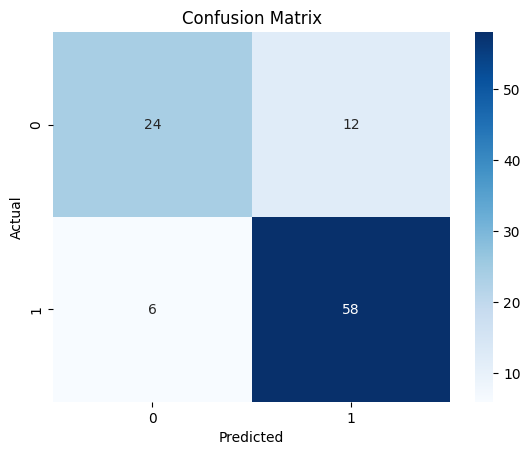

In [84]:
# plot a confusion matrix using seaborn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm  = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Save the model

In [85]:
# save the model using joblib
import joblib
joblib.dump(model, 'random_forest_model.joblib')

['random_forest_model.joblib']